## Gene-RNA-Protein abundance

In the previous chapter we introduced the identification of non-canonical products of the genome. We are now going to investigate how the abundance of gene, transcript, and proteins relate to each other. 

### Genotype - peptide abundance relationship

##### _❔ If a genetic variant can change the amino acid of a protein, what peptides do we expect to find? How should the peptide abundance relate to the genotype of the patient? What are the hypotheses underlying this model?_

We will use again the proteogenomic analysis by [Johansson _et al._](https://www.nature.com/articles/s41467-019-09018-y). Figure 7h displays the intensity of peptides relative to the allelic statuses of different patients.

![Figure_7h](resources/images/Fig7h.png?raw=true "Johansson et al. Fig 7h")

> Figure 7h in Johansson _et al._.

Note that the genotyping data corresponding to the peptide intensities were not made available, but more examples can be found in [Supplementary Figure 15](../resources/Johansson_et_al_breast_cancer_quantitative_proteome_and_proteogenomic_landscape/supplementary_information.pdf).

##### 💬 Do the results presented follow a linear trend? What can affect the linearity of the relationship between number of alleles and intensity distribution? 

### CNA attenuation

Another type of genomic variation that can affect the number of alleles coding a gene is structural variants, called copy number variation or alteration (CNV or CNA), where large sections of the genome, possibly spanning entire genes, are copied or deleted. We are now going to inspect how gene copy numbers correlate with RNA and protein levels.

#### Libraries

In the following We will need the following libraries. If they are not installed, an error will be thrown, install them using the `install.packages` function.

In [1]:
library(conflicted) # A very convenient package to avoid and resolve namespace conflicts
library(tidyr) # A reference package to tidy data
library(dplyr) # A reference package to manipulate data
library(ggplot2) # A reference package to plot data
library(scico) # Color palettes for scientific data visualization
library(gtable) # A package to manipulate and arrange plots
library(grid) # A package to draw plots
library(mclust) # A package for clustering
library(igraph) # A package to manipulate graphs

conflict_prefer("filter", "dplyr") # Conflict resolution for the 'filter' function 

theme_set(theme_bw(base_size = 13)) # Theme to use for all plots

Warning message:
"package 'conflicted' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"replacing previous import 'vctrs::data_frame' by 'tibble::data_frame' when loading 'dplyr'"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'scico' was built under R version 3.6.3"
Warning message:
"package 'gtable' was built under R version 3.6.3"
Warning message:
"package 'mclust' was built under R version 3.6.3"
Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.

Warning message:
"package 'igraph' was built under R version 3.6.3"
[conflicted] Will prefer dplyr::filter over any other package



[Johansson _et al._](https://www.nature.com/articles/s41467-019-09018-y) conduct a correlation analysis similar to [Gonçalves _et al._](https://pubmed.ncbi.nlm.nih.gov/29032074), where the correlation of protein abundances with CNA is compared to the correlation of RNA levels with CNA. These values are provided in their _Supplementary Table 5_. The correlation values in R-friendly format are availabe in [`resources/data/cna-rna-protein`](resources/data/cna-rna-protein).

##### 👨‍💻 Import the correlation results.

In [2]:
# Load the file, select the columns of interest, format the columns and content

cnaCorDF <- read.table(
    file = "resources/data/cna-rna-protein",
    header = T,
    sep = "\t",
    comment.char = "",
    quote = "",
    stringsAsFactors = F
)

##### ❔ What do the columns represent? What is the difference between Pearson and Spearman correlations?

##### 👨‍💻 Plot the correlation results for proteins against mRNA.

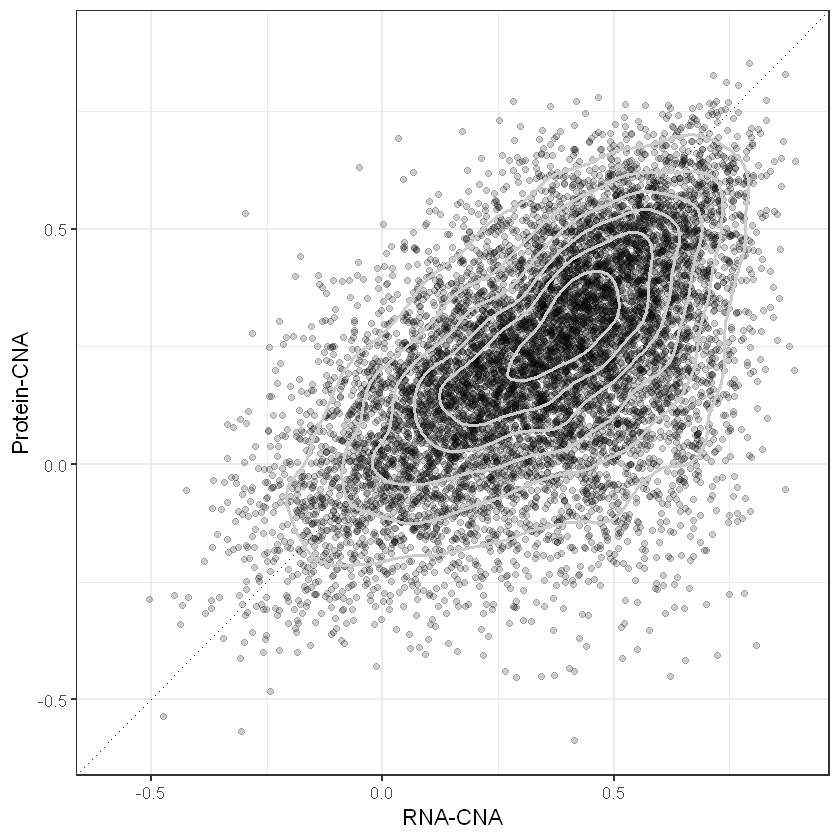

In [16]:
# Get the min and max values of the plot

axisMin <- min(c(cnaCorDF$mRNA_Spearman_correlation, cnaCorDF$protein_Spearman_correlation))
axisMax <- max(c(cnaCorDF$mRNA_Spearman_correlation, cnaCorDF$protein_Spearman_correlation))

scatterPlot <- ggplot(
    data = cnaCorDF
) +
    geom_abline(
        slope = 1,
        intercept = 0,
        linetype = "dotted",
        col = "black",
        alpha = 0.8
    ) +
    geom_point(
        mapping = aes(
            x = mRNA_Spearman_correlation,
            y = protein_Spearman_correlation
        ),
        col = "black",
        alpha = 0.2
    ) +
    geom_density_2d(
        mapping = aes(
            x = mRNA_Spearman_correlation,
            y = protein_Spearman_correlation
        ),
        col = "grey80",
        size = 0.9
    ) +
    scale_x_continuous(
        name = "RNA-CNA",
        limits = c(axisMin, axisMax)
    ) +
    scale_y_continuous(
        name = "Protein-CNA",
        limits = c(axisMin, axisMax)
    ) +
    theme(
        legend.position = "none"
    )

grid.draw(scatterPlot)


##### ❔ As you can see, scatter does not follow the diagonal, and instead draws a triangle, how do you interpret this?

Copy number variation is associated with increased or decreased gene expression, but the association with protein abundances is less pronounced: the effect of CNAs is post-translationally attenuated. This was first discovered by [Gonçalves _et al._](https://pubmed.ncbi.nlm.nih.gov/29032074) and [Johansson _et al._](https://www.nature.com/articles/s41467-019-09018-y).

##### 💬 In you opinion, what mechanisms can affect the association between CNA, gene expression, and protein abundances? 

When building such plots, it is visually useful to look at the distribution of points on the x and y axes. We are now going to plot the density of points on these directions and add them to the plot using the `grid` package.


##### 👨‍💻 Add densities on the x and y directions.

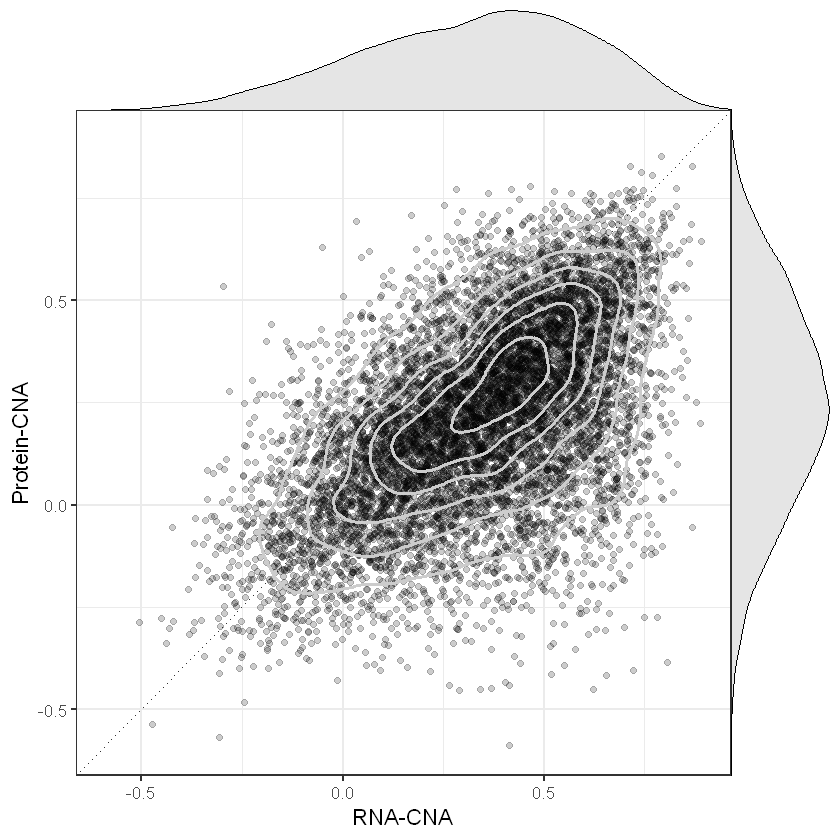

In [17]:
# Build the density plots

rnaDensityPlot <- ggplot(
    data = cnaCorDF
) + theme_minimal() + 
    geom_density(
        mapping = aes(
            x = mRNA_Spearman_correlation
        ),
        fill = "black",
        alpha = 0.1
    ) +
    scale_x_continuous(
        expand = c(0, 0)
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    ) +
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        panel.grid = element_blank()
    )

proteinDensityPlot <- ggplot(
    data = cnaCorDF
) + theme_minimal() + 
    geom_density(
        mapping = aes(
            x = protein_Spearman_correlation
        ),
        fill = "black",
        alpha = 0.1
    ) +
    scale_x_continuous(
        expand = c(0, 0)
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    ) +
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        panel.grid = element_blank()
    ) + 
    coord_flip()


# Make grobs from plots

scatterGrob <- ggplotGrob(scatterPlot)
rnaDensityGrob <- ggplotGrob(rnaDensityPlot)
proteinDensityGrob <- ggplotGrob(proteinDensityPlot)


# Insert the densities as new row and column in the scatter grob

mergedGrob <- rbind(scatterGrob[1:6, ], rnaDensityGrob[7, ], scatterGrob[7:nrow(scatterGrob), ], size = "last")
mergedGrob$heights[7] <- unit(0.15, "null")

proteinDensityGrob <- gtable_add_rows(
    x = proteinDensityGrob, 
    heights = unit(rep(0, nrow(mergedGrob) - nrow(proteinDensityGrob)), "null"), 
    pos = 0
)

mergedGrob <- cbind(mergedGrob[, 1:5], proteinDensityGrob[, 5], mergedGrob[, 6:ncol(mergedGrob)], size = "first")
mergedGrob$widths[6] <- unit(0.15, "null")


# Plot

grid.draw(mergedGrob)

Gonçalves _et al._ define the attenuation coefficient as the difference between the correlation of the transcript and protein levels with the CNA, where a positive and negative coefficient indicate a lower and higher correlation at the protein level, respectively.

##### 👨‍💻 Estimate the attenuation coefficient and plot its density.

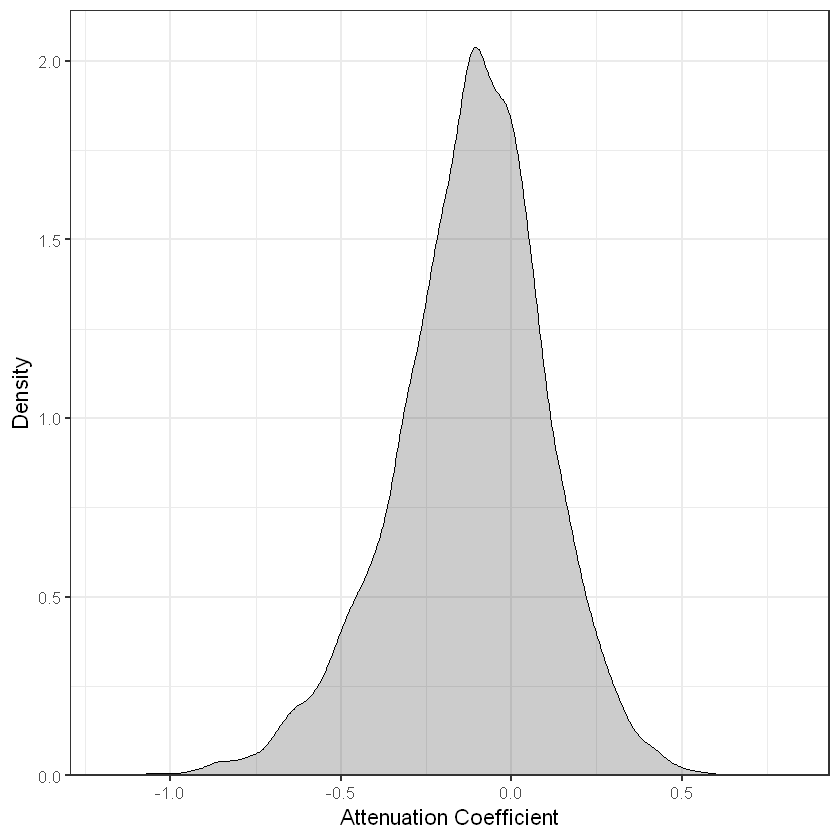

In [21]:
# Attenuation coefficient

cnaCorDF <- cnaCorDF %>%
    mutate(
        attenuation_coefficient = protein_Spearman_correlation - mRNA_Spearman_correlation
    )


# Build density plot

ggplot(
    data = cnaCorDF
) +
    geom_density(
        mapping = aes(
            x = attenuation_coefficient
        ),
        fill = "black",
        alpha = 0.2
    ) +
    scale_x_continuous(
        name = "Attenuation Coefficient"
    ) +
    scale_y_continuous(
        name = "Density",
        expand =  expansion(
            mult = c(0, 0.05)
        )
    )

The authors suggest that this distribution is the combination of two populations of CNAs: post-translationally attenuated and not. They model the distributions of the two populations using Gaussian mixture modelling, where the overall density is decomposed into the sum of densities from Gaussian distributions. 

##### 👨‍💻 Run Gaussian mixture modelling on the attenuation coefficient.

In [22]:
gmm <- densityMclust(cnaCorDF$attenuation_coefficient)

summary(gmm, parameters = TRUE)

------------------------------------------------------- 
Density estimation via Gaussian finite mixture modeling 
------------------------------------------------------- 

Mclust V (univariate, unequal variance) model with 2 components: 

 log-likelihood    n df      BIC       ICL
       935.4068 9533  5 1825.001 -5820.576

Mixing probabilities:
        1         2 
0.4575145 0.5424855 

Means:
          1           2 
-0.19107681 -0.06326037 

Variances:
         1          2 
0.07075618 0.02468789 

##### ❔ How many gaussian distributions were suggested by the model? What do the _Mixing probabilities_, _Means_, and _Variances_ represent?

##### ❔ Based on this, how many CNAs are considered attenuated?

##### 👨‍💻 Overlay the density and the model.

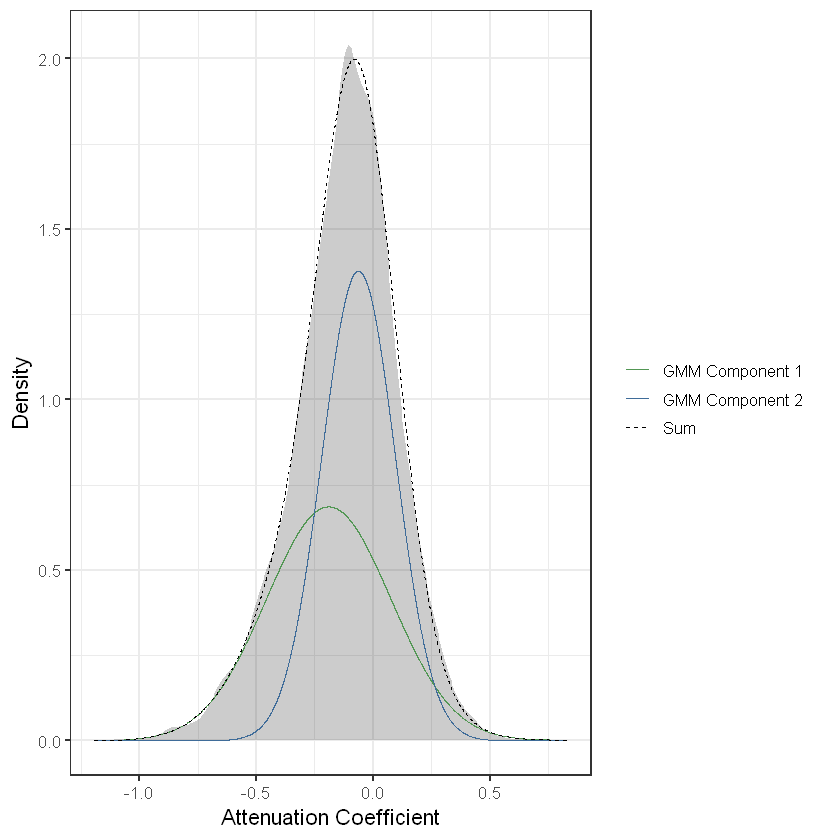

In [23]:
# Density from first component

gmm_density_1 <- gmm$parameters$pro[1] * dnorm(
    x = cnaCorDF$attenuation_coefficient, 
    mean = gmm$parameters$mean[1], 
    sd = sqrt(gmm$parameters$variance$sigmasq[1])
)

# Density from second component

gmm_density_2 <- gmm$parameters$pro[2] * dnorm(
    x = cnaCorDF$attenuation_coefficient, 
    mean = gmm$parameters$mean[2], 
    sd = sqrt(gmm$parameters$variance$sigmasq[2])
)

# Sum

gmm_density_sum <- gmm_density_1 + gmm_density_2


# Gather densities in a data frame

plotDF <- data.frame(
    x = c(
        rep(
            x = cnaCorDF$attenuation_coefficient,
            3
        )
    ),
    y = c(
        gmm_density_1,
        gmm_density_2,
        gmm_density_sum
    ),
    category = factor(
        x = c(rep("GMM Component 1", nrow(cnaCorDF)), rep("GMM Component 2", nrow(cnaCorDF)), rep("Sum", nrow(cnaCorDF))),
        levels = c("GMM Component 1", "GMM Component 2", "Sum")
    )
)

# Build overlayed density plot

ggplot() +
    geom_density(
        data = cnaCorDF,
        mapping = aes(
            x = attenuation_coefficient
        ),
        fill = "black",
        col = NA,
        alpha = 0.2
    ) +
    geom_line(
        data = plotDF,
        mapping = aes(
            x = x,
            y = y,
            col = category,
            linetype = category
        )
    ) +
    scale_x_continuous(
        name = "Attenuation Coefficient"
    ) +
    scale_y_continuous(
        name = "Density"
    ) +
    scale_color_manual(
        values = c(
            scico(
                n = 2,
                palette = "cork",
                begin = 0.2,
                end = 0.8,
                direction = -1
            ),
            "black"
        )
    ) +
    scale_linetype_manual(
        values = c(
            "solid",
            "solid",
            "dashed"
        )
    ) +
    theme(
        legend.title = element_blank()
    )

##### ❔ Which component represents the attenuated distribution? How can we classify CNAs based on these distributions?

##### 💬 What do you think of the quality of the modelling?

In the following, we use the cumulative distribution function of the second component to scale the attenuation coefficient, and use the biologists' favorite threshold of 0.05 to highlight the confidently attenuated CNAs.

##### 👨‍💻 Scale the attenuation coefficient, threshold at 0.05, and plot on top of the distributions.

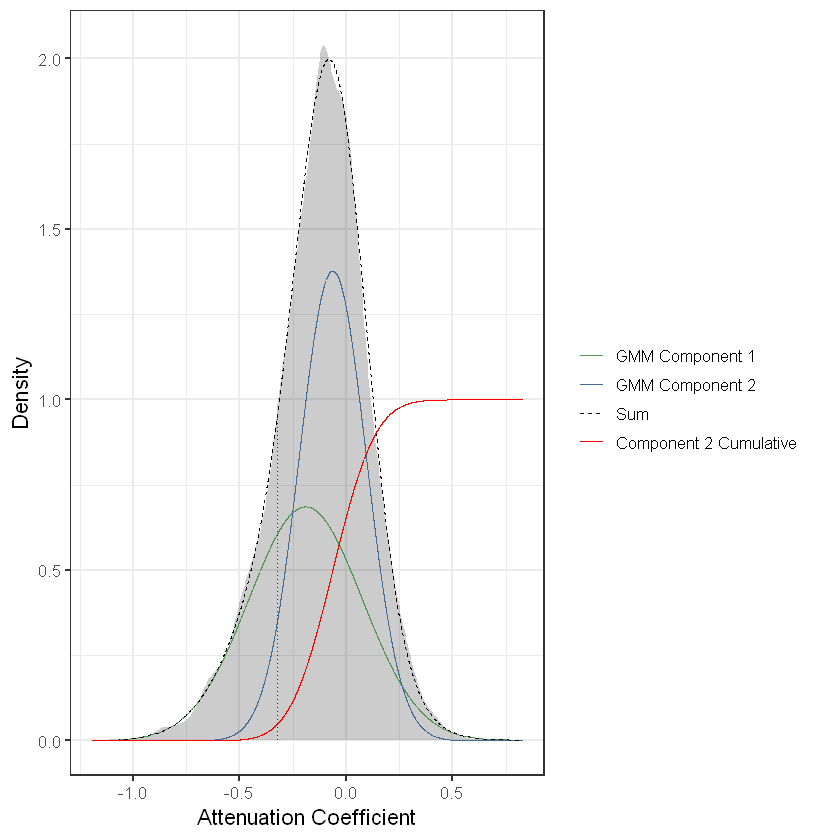

In [24]:
# Scale the attenuation coefficient

cnaCorDF$attenuation_p <- pnorm(
    q = cnaCorDF$attenuation_coefficient,
    mean = gmm$parameters$mean[2],
    sd = sqrt(gmm$parameters$variance$sigmasq[2])
)


# Threshold at 0.05

cnaCorDF$attenuation_category <- factor(
    x = ifelse(cnaCorDF$attenuation_p <= 0.05, "Attenuated", "Background"),
    levels = c("Attenuated", "Background")
)


# Gather densities in a data frame

plotDF <- data.frame(
    x = c(
        rep(
            x = cnaCorDF$attenuation_coefficient,
            4
        )
    ),
    y = c(
        gmm_density_1,
        gmm_density_2,
        gmm_density_sum,
        cnaCorDF$attenuation_p
    ),
    category = factor(
        x = c(rep("GMM Component 1", nrow(cnaCorDF)), rep("GMM Component 2", nrow(cnaCorDF)), rep("Sum", nrow(cnaCorDF)), rep("Component 2 Cumulative", nrow(cnaCorDF))),
        levels = c("GMM Component 1", "GMM Component 2", "Sum", "Component 2 Cumulative")
    )
)

# Build overlayed density plot

xThreshold <- qnorm(
    p = 0.05,
    mean = gmm$parameters$mean[2],
    sd = sqrt(gmm$parameters$variance$sigmasq[2])
)
yThreshold <- gmm$parameters$pro[1] * dnorm(
    x = xThreshold, 
    mean = gmm$parameters$mean[1], 
    sd = sqrt(gmm$parameters$variance$sigmasq[1])
) +  gmm$parameters$pro[2] * dnorm(
    x = xThreshold, 
    mean = gmm$parameters$mean[2], 
    sd = sqrt(gmm$parameters$variance$sigmasq[2])
)

ggplot() +
    geom_density(
        data = cnaCorDF,
        mapping = aes(
            x = attenuation_coefficient
        ),
        fill = "black",
        col = NA,
        alpha = 0.2
    ) +
    geom_line(
        data = plotDF,
        mapping = aes(
            x = x,
            y = y,
            col = category,
            linetype = category
        )
    ) +
    geom_segment(
        mapping = aes(
            x = xThreshold,
            xend = xThreshold,
            y = 0,
            yend = yThreshold
        ),
        linetype = "dotted",
        col = "darkred"
    ) +
    scale_x_continuous(
        name = "Attenuation Coefficient"
    ) +
    scale_y_continuous(
        name = "Density"
    ) +
    scale_color_manual(
        values = c(
            scico(
                n = 2,
                palette = "cork",
                begin = 0.2,
                end = 0.8,
                direction = -1
            ),
            "black",
            "red"
        )
    ) +
    scale_linetype_manual(
        values = c(
            "solid",
            "solid",
            "dashed",
            "solid"
        )
    ) +
    theme(
        legend.title = element_blank()
    )

##### ❔ Using this threshold: What is the share of CNAs considered attenuated that would come from the component 2 distribution? What is the share of CNAs considered not attenuated that would come from the component 1? How will this influence the analyses?

##### 👨‍💻 Highlight the attenuated CNAs in the scatter plot.

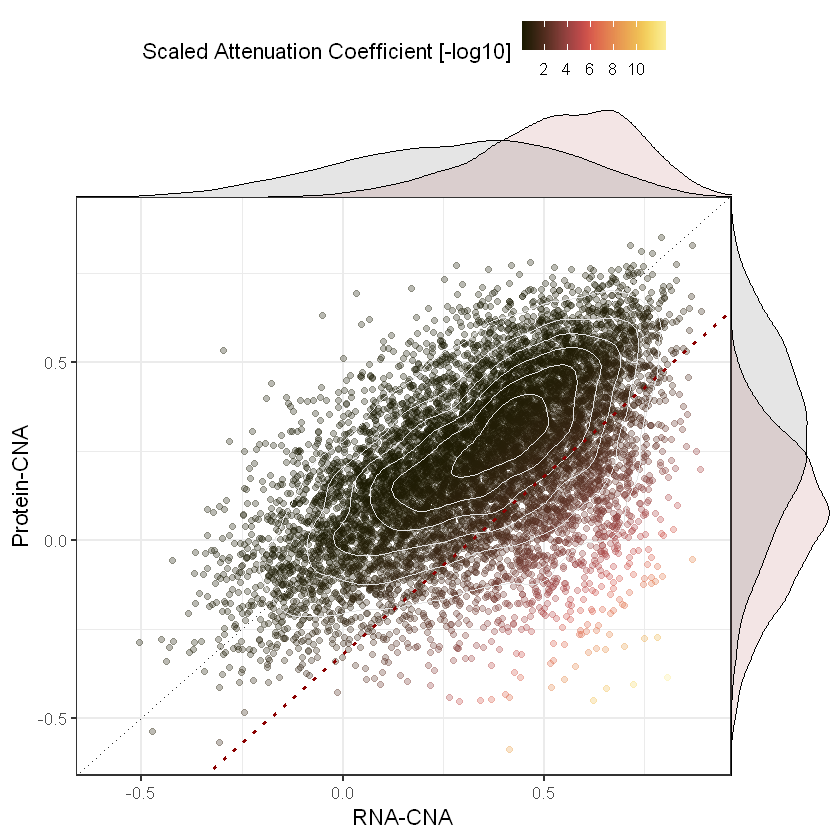

In [29]:
# Build the scatter plot with points colored by (logged) attenuation coefficient

axisMin <- min(c(cnaCorDF$mRNA_Spearman_correlation, cnaCorDF$protein_Spearman_correlation))
axisMax <- max(c(cnaCorDF$mRNA_Spearman_correlation, cnaCorDF$protein_Spearman_correlation))

cnaCorDF <- cnaCorDF %>%
    arrange(
        desc(attenuation_p)
    )

scatterPlot <- ggplot(
    data = cnaCorDF
) +
    geom_abline(
        slope = 1,
        intercept = 0,
        linetype = "dotted",
        col = "black",
        alpha = 0.8
    ) +
    geom_point(
        mapping = aes(
            x = mRNA_Spearman_correlation,
            y = protein_Spearman_correlation,
            col = -log10(attenuation_p)
        ),
        alpha = 0.3
    ) +
    geom_density_2d(
        mapping = aes(
            x = mRNA_Spearman_correlation,
            y = protein_Spearman_correlation
        ),
        col = "grey90"
    ) +
    geom_abline(
        slope = 1,
        intercept = xThreshold,
        color = "darkred",
        linetype = "dotted",
        size = 0.9
    ) +
    scale_color_scico(
        name = "Scaled Attenuation Coefficient [-log10]",
        palette = "lajolla",
        direction = -1,
        begin = 0.1,
        breaks = seq(0, 10, 2)
    ) +
    scale_x_continuous(
        name = "RNA-CNA",
        limits = c(axisMin, axisMax)
    ) +
    scale_y_continuous(
        name = "Protein-CNA",
        limits = c(axisMin, axisMax)
    ) +
    theme(
        legend.position = "top"
    )


# Build the density plots separating the points passing the attenuation threshold

rnaDensityPlot <- ggplot(
    data = cnaCorDF
) + theme_minimal() + 
    geom_density(
        mapping = aes(
            x = mRNA_Spearman_correlation,
            fill = attenuation_category
        ),
        alpha = 0.1
    ) +
    scale_fill_manual(
        values = c("darkred", "black")
    ) +
    scale_x_continuous(
        expand = c(0, 0)
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    ) +
    theme(
        legend.position = "none",
        axis.title = element_blank(),
        axis.text = element_blank(),
        panel.grid = element_blank()
    )

proteinDensityPlot <- ggplot(
    data = cnaCorDF
) + theme_minimal() + 
    geom_density(
        mapping = aes(
            x = protein_Spearman_correlation,
            fill = attenuation_category
        ),
        alpha = 0.1
    ) +
    scale_fill_manual(
        values = c("darkred", "black")
    ) +
    scale_x_continuous(
        expand = c(0, 0)
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    ) +
    theme(
        legend.position = "none",
        axis.title = element_blank(),
        axis.text = element_blank(),
        panel.grid = element_blank()
    ) + 
    coord_flip()


# Make grobs from plots

scatterGrob <- ggplotGrob(scatterPlot)
rnaDensityGrob <- ggplotGrob(rnaDensityPlot)
proteinDensityGrob <- ggplotGrob(proteinDensityPlot)


# Insert the densities as new row and column in the scatter grob

mergedGrob <- rbind(scatterGrob[1:8, ], rnaDensityGrob[7, ], scatterGrob[9:nrow(scatterGrob), ], size = "last")
mergedGrob$heights[9] <- unit(0.15, "null")

proteinDensityGrob <- gtable_add_rows(
    x = proteinDensityGrob, 
    heights = unit(rep(0, nrow(mergedGrob) - nrow(proteinDensityGrob)), "null"), 
    pos = 0
)

mergedGrob <- cbind(mergedGrob[, 1:5], proteinDensityGrob[, 5], mergedGrob[, 6:ncol(mergedGrob)], size = "first")
mergedGrob$widths[6] <- unit(0.15, "null")


# Plot

grid.draw(mergedGrob)

##### 💬 Can you speculate on the mechanism underlying CNA attenuation? How would you use this in the context of cancer research?